# DONATOR SEGMENTATION & TARGETED PROPENSITY MODELLING

#### BACKGROUND

Konsistensi masyarakat Indonesia untuk mendonasikan sebagian penghasilan ke lembaga amal terbilang rendah. Selain itu banyak donatur yang berdonasi selain di lembaga Amil Zakat X. Oleh karena itu Lembaga Amil Zakat X perlu melakukan segmentasi dan membuat model machine learning untuk meningkatkan engagement donatur agar dapat berdonasi kembali di lembaga Amil Zakat X.


#### BUSINESS OBJECTIVE

Membuat Donatur Segmentation Model untuk segmentasi donatur dan membuat Targeted Propensity Modelling untuk melihat siapa saja donatur yang memiliki kecenderungan untuk berdonasi kembali dengan memperhatikan keterbatasan anggaran.


## Processing Data

In [1]:
import numpy as np
import datetime as dt
import datetime
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Data/data transaksi.csv")

In [3]:
data.head()

,ID_Transaksi,ID_Donatur,Device,Category,Tanggal,Nominal,Metode_Pembayaran
0,4,3,NaN,Zakat Penghasilan,2019-12-24 07:57:18,100.0,gopay
1,5,66,NaN,Zakat Penghasilan,2019-12-31 19:44:53,125000.0,bank_transfer
2,6,54,NaN,Zakat Penghasilan,2020-01-02 19:07:03,20000.0,bank_transfer
3,7,70,NaN,Zakat Penghasilan,2020-01-03 17:11:19,100000.0,bank_transfer
4,9,27229,NaN,Zakat Penghasilan,2020-01-10 17:48:18,700000.0,bank_transfer


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_Transaksi       914 non-null    int64  
 1   ID_Donatur         914 non-null    int64  
 2   Device             772 non-null    object 
 3   Category           914 non-null    object 
 4   Tanggal            914 non-null    object 
 5   Nominal            914 non-null    float64
 6   Metode_Pembayaran  910 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [5]:
data.isnull().sum()

ID_Transaksi           0
ID_Donatur             0
Device               142
Category               0
Tanggal                0
Nominal                0
Metode_Pembayaran      4
dtype: int64

#### Data Cleansing Pt.1

dikarenakan kolom metode pembayaran ada null values sebanyak 4 dan kolom device sebanyak 142, null values metode pembayaran akan di isi dengan modus dan kolom device akan disi dengan 'tidak diketahui'

In [6]:
# fill na dengan modus
data['Metode_Pembayaran'].replace(np.nan, data['Metode_Pembayaran'].mode()[0], inplace=True)
#fill na dengan 'tidak diketahui'
data['Device'].replace(np.nan, 'Tidak_Diketahui', inplace=True)
#data[data['Metode_Pembayaran'].notnull()] untuk filter rows yanng tidak notnull

1. Metode Pembayaran yang harus diperbaiki
(gopay -> Gopay
bank_transfer -> Bank Transfer
BCA -  -> BCA
BNI -  -> BNI
BRI -  -> BRI
CREDITCARD -> credit_card
Mandiri - -> Mandiri
Mandiri Bill -> Mandiri
Mandiri Syariah - -> Mandiri Syariah
Muamalat - -> Muamalat
Transfer Bank Mandiri - -> Mandiri
Transfer Bank Mandiri Syariah - -> Mandiri Syariah)

In [7]:
for x in data['Metode_Pembayaran']:
    if 'gopay' in x:
        data['Metode_Pembayaran'].replace(x, 'Gopay', inplace=True)
    elif 'bank_transfer' in x:
        data['Metode_Pembayaran'].replace(x, 'Bank Transfer', inplace=True)
    elif 'BCA' in x:
        data['Metode_Pembayaran'].replace(x, 'BCA', inplace=True)
    elif 'BNI' in x:
        data['Metode_Pembayaran'].replace(x, 'BNI', inplace=True)
    elif 'BRI' in x:
        data['Metode_Pembayaran'].replace(x, 'BRI', inplace=True)
    elif 'CREDITCARD' in x:
        data['Metode_Pembayaran'].replace(x, 'credit_card', inplace=True)
    elif 'Mandiri Syariah' in x:
        data['Metode_Pembayaran'].replace(x, 'Mandiri Syariah', inplace=True)
    elif 'Mandiri Bill' in x:
        data['Metode_Pembayaran'].replace(x, 'MANDIRI', inplace=True)
    elif 'Mandiri' in x:
        data['Metode_Pembayaran'].replace(x, 'MANDIRI', inplace=True)
    elif 'Muamalat' in x:
        data['Metode_Pembayaran'].replace(x, 'Muamalat', inplace=True)
    elif 'Transfer Bank Mandiri Syariah' in x:
        data['Metode_Pembayaran'].replace(x, 'Mandiri Syariah', inplace=True)
    elif 'Transfer Bank Mandiri' in x:
        data['Metode_Pembayaran'].replace(x, 'MANDIRI', inplace=True)

In [8]:
for x in data['Device']:
    if 'Web Mobile' in x:
        data['Device'].replace(x, 'mobile app', inplace=True)
    elif 'WEB' in x:
        data['Device'].replace(x, 'Web', inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_Transaksi       914 non-null    int64  
 1   ID_Donatur         914 non-null    int64  
 2   Device             914 non-null    object 
 3   Category           914 non-null    object 
 4   Tanggal            914 non-null    object 
 5   Nominal            914 non-null    float64
 6   Metode_Pembayaran  914 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 50.1+ KB


### Business Understanding

In [10]:
tmp = data.copy()
tmp.head(1)

,ID_Transaksi,ID_Donatur,Device,Category,Tanggal,Nominal,Metode_Pembayaran
0,4,3,Tidak_Diketahui,Zakat Penghasilan,2019-12-24 07:57:18,100.0,Gopay


In [11]:
tmp['Nominal'].describe()

count    9.140000e+02
mean     5.329124e+05
std      1.159482e+06
min      1.000000e+00
25%      1.250000e+05
50%      2.500000e+05
75%      5.000000e+05
max      1.162500e+07
Name: Nominal, dtype: float64

nominal tertinggi yang dibayarkan selama periode 2019 - 2022 sebesar 11.162.500 rupiah dan nominal terendah sebesar 1 rupiah

In [12]:
tmp['Tanggal'] = pd.to_datetime(tmp['Tanggal'], format='%Y-%m-%d')

tmp['year'] = tmp['Tanggal'].apply(lambda x: pd.to_datetime(x).year)
tmp['month'] = tmp['Tanggal'].apply(lambda x: pd.to_datetime(x).month)
tmp['day'] = tmp['Tanggal'].apply(lambda x: pd.to_datetime(x).day)
tmp['Hari'] = tmp['Tanggal'].apply(lambda x: pd.to_datetime(x).day_name())

[]

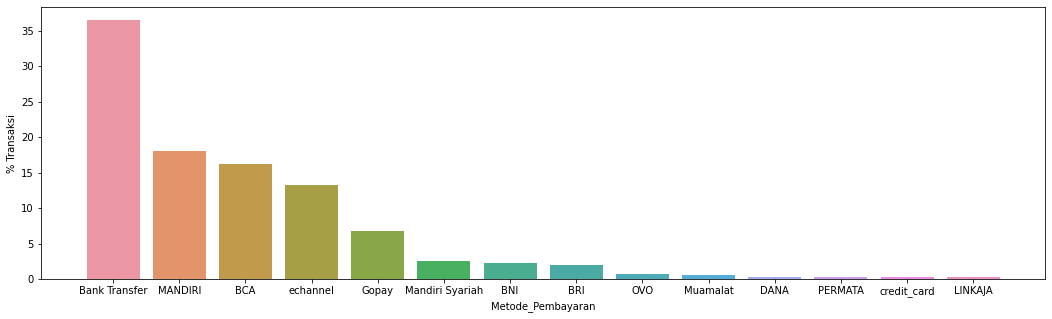

In [13]:
metode = tmp.groupby(['Metode_Pembayaran'])['ID_Transaksi'].count().reset_index().sort_values(by=['ID_Transaksi'], ascending=False)
metode.rename({'ID_Transaksi':'Jumlah Transaksi'}, inplace=True, axis=1)
transaksi = metode['Jumlah Transaksi'].div(metode['Jumlah Transaksi'].sum())*100
plt.figure(figsize=(18,5))
sns.barplot(x=metode['Metode_Pembayaran'], y=transaksi)
plt.ylabel('% Transaksi')
plt.plot()

kebanyakan transaksi menggunakan :
1. Bank Transfer sebesar 36,54 % transaksi
2. Mandiri sebesar 18,05 % transaksi
3. BCA sebesar 16,19 % transaksi

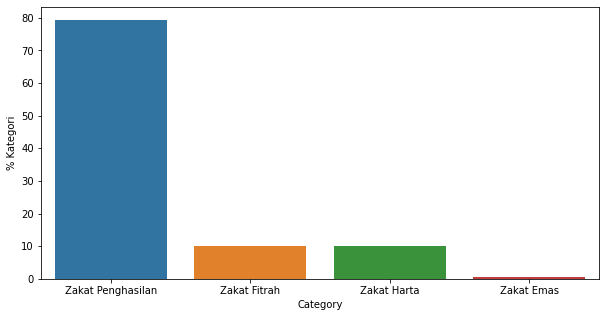

In [14]:
kategori = tmp.groupby(['Category'])['ID_Transaksi'].count().reset_index().sort_values(by=['ID_Transaksi'], ascending=False)
kategori.rename({'ID_Transaksi':'Total'}, inplace=True, axis=1)
zakat = kategori['Total'].div(kategori['Total'].sum())*100
plt.figure(figsize=(10,5))
sns.barplot(x=kategori['Category'], y=zakat)
plt.ylabel('% Kategori')
plt.show()

1. sebesar 79.32 % transaksi ditujukan untuk zakat penghasilan
2. sebesar 10.17 % transaksi ditujukan untuk zakat fitrah
3. sebesar 10.06 % transaksi ditujukan untuk zakat harta
4. sebesar 0.437 % transaksi ditujukan untuk zakat emas

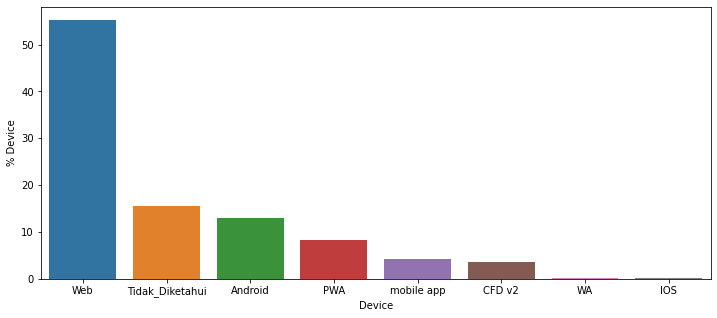

In [15]:
device = tmp.groupby(['Device'])['ID_Transaksi'].count().reset_index().sort_values(by=['ID_Transaksi'],ascending=False)
device.rename({'ID_Transaksi':'Total'}, inplace=True, axis=1)
percent = device['Total'].div(device['Total'].sum())*100

plt.figure(figsize=(12,5))
sns.barplot(x=device['Device'], y=percent)
plt.ylabel('% Device')
plt.show()

1. sebesar 55.25 % transaksi dilakukan di website
2. sebesar 15.25 % tidak diketahui transaksi dilakukan di platform apa
3. sebesar 12.91 % transaksi dilakukan di android

In [16]:
donasi_2019 = tmp[tmp['year']==2019].groupby(['year', 'month']).Nominal.agg('sum').reset_index()
donasi_2019

,year,month,Nominal
0,2019,12,6881300.0


donasi tertinggi hanya terjadi pada bulan desember pada tahun 2019 sebesar 6.881.300 juta rupiah

<AxesSubplot:xlabel='Hari', ylabel='Frekuensi Transaksi'>

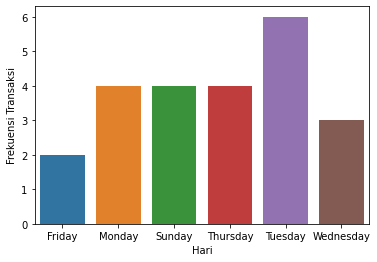

In [17]:
hari_2019 = tmp[(tmp['year']==2019) & (tmp['month']==12)].groupby(['Hari'])['ID_Transaksi'].count().reset_index()
hari_2019.rename({'ID_Transaksi':'Frekuensi Transaksi'}, inplace=True, axis=1)
sns.barplot(x='Hari', y='Frekuensi Transaksi', data=hari_2019)

pada tahun 2019 bulan desember, total transaksi paling banyak terjadi di hari selasa

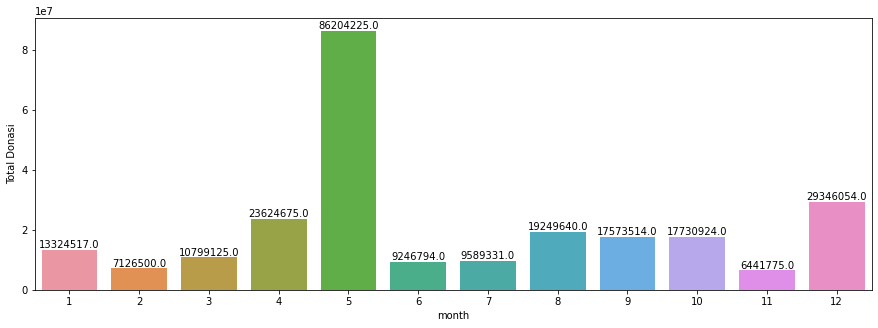

In [18]:
donasi_2020 = tmp[tmp['year']==2020].groupby(['year', 'month'])['Nominal'].sum().reset_index()
donasi_2020.rename({'Nominal':'Total Donasi'}, inplace=True, axis=1)

plt.figure(figsize=(15,5))

ax = sns.barplot(x='month', y='Total Donasi', data=donasi_2020)

for p in ax.patches:
    ax.annotate(p.get_height(),
                xy = (p.get_x() + p.get_width()/2, p.get_height()),
                ha = 'center', va='bottom')

donasi tertinggi pada tahun 2020 yaitu pada bulan Mei sebesar 86.204.225 juta rupiah 

In [19]:
zakat = tmp[(tmp['year']==2020) & (tmp['month']==5)].groupby(['Category', 'Metode_Pembayaran'])['Nominal'].sum().reset_index()
zakat.rename({'Nominal':'Total Donasi'}, inplace=True, axis=1)
zakat

,Category,Metode_Pembayaran,Total Donasi
0,Zakat Fitrah,Bank Transfer,4855000.0
1,Zakat Fitrah,Gopay,1582500.0
2,Zakat Fitrah,echannel,1680000.0
3,Zakat Harta,Bank Transfer,14000000.0
4,Zakat Harta,Gopay,500000.0
5,Zakat Harta,echannel,9500000.0
6,Zakat Penghasilan,Bank Transfer,16738384.0
7,Zakat Penghasilan,Gopay,1150301.0
8,Zakat Penghasilan,echannel,36198040.0


<Figure size 1080x360 with 0 Axes>

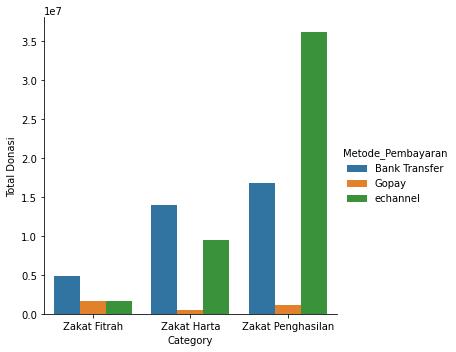

In [20]:
plt.figure(figsize=(15,5))
sns.catplot(x='Category', y='Total Donasi', hue='Metode_Pembayaran', kind='bar', data=zakat)

selama tahun 2020, donasi tertinggi berasal dari bulan Mei sebesar 86.204.225 juta rupiah, dimana donasi tersebut sebagian besar berasal dari zakat penghasilan. dari zakat penghasilan didapatkan bahwa :
1. 16.738.384 juta rupiah berasal dari metode pembayaran Bank Transfer
2. 1.150.301 juta rupiah berasal dari metode pembayaran gopay
3. 36.198.040 juta rupiah berasal dari metode pembayaran echannel

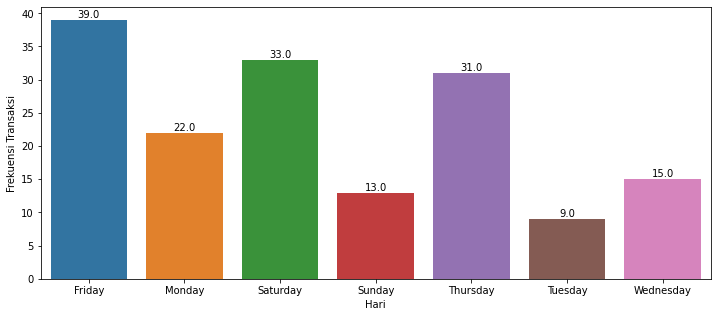

In [21]:
hari_2020 = tmp[(tmp['year']==2020) & (tmp['month']==5)].groupby(['Hari'])['ID_Transaksi'].count().reset_index()
hari_2020.rename({'ID_Transaksi':'Frekuensi Transaksi'}, inplace=True, axis=1)

plt.figure(figsize=(12,5))

ax = sns.barplot(x='Hari', y='Frekuensi Transaksi', data=hari_2020)

for p in ax.patches:
    ax.annotate(p.get_height(),
               xy = (p.get_x() + p.get_width()/2, p.get_height()),
               ha='center', va='bottom')

pada bulan Mei tahun 2020, transaksi banyak dilakukan di hari jumat sebanyak 39 transaksi

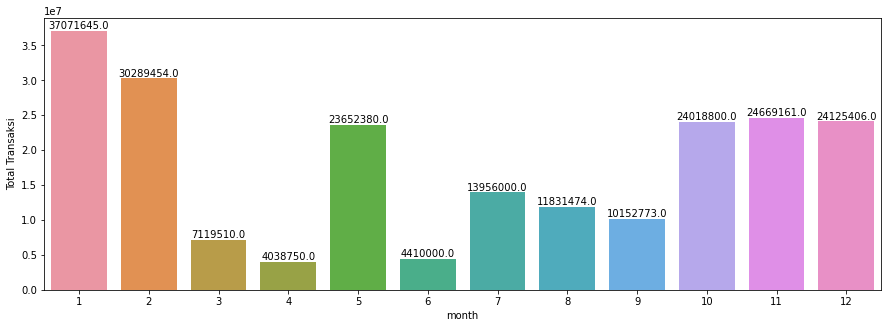

In [22]:
donasi_2021 = tmp[tmp['year']==2021].groupby(['year', 'month'])['Nominal'].sum().reset_index()
donasi_2021.rename({'Nominal':'Total Transaksi'}, inplace=True, axis=1)

plt.figure(figsize=(15,5))

ax = sns.barplot(x='month', y='Total Transaksi', data=donasi_2021)

for p in ax.patches:
    ax.annotate(p.get_height(),
               xy = (p.get_x() + p.get_width()/2, p.get_height()),
               ha = 'center', va='bottom')

In [24]:
zakat_2021 = tmp[(tmp['year']==2021) & (tmp['month']==1)].groupby(['Category', 'Metode_Pembayaran'])['Nominal'].sum().reset_index()
zakat_2021.rename({'Nominal':'Total Donasi'}, inplace=True, axis=1)
zakat_2021

,Category,Metode_Pembayaran,Total Donasi
0,Zakat Emas,echannel,1000000.0
1,Zakat Harta,BCA,100000.0
2,Zakat Harta,Bank Transfer,5201250.0
3,Zakat Harta,echannel,100000.0
4,Zakat Penghasilan,BCA,6837500.0
5,Zakat Penghasilan,BRI,150000.0
6,Zakat Penghasilan,Bank Transfer,2810000.0
7,Zakat Penghasilan,Gopay,75000.0
8,Zakat Penghasilan,MANDIRI,11655663.0
9,Zakat Penghasilan,Mandiri Syariah,650232.0


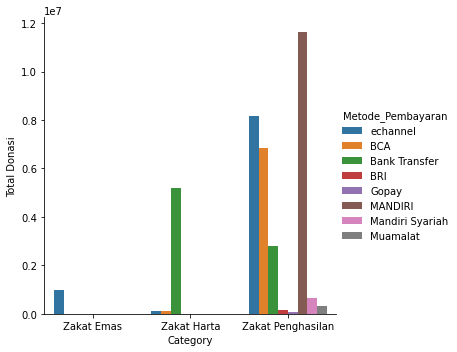

In [25]:
sns.catplot(x='Category', y='Total Donasi', hue='Metode_Pembayaran', data=zakat_2021, kind='bar')

selama tahun 2021, donasi tertinggi berasal dari bulan Januari sebesar 37.071.645 juta rupiah, dimana donasi tersebut sebagian besar berasal dari zakat penghasilan. dari zakat penghasilan didapatkan bahwa :
1. 11.655.663 juta rupiah berasal dari metode pembayaran Mandiri
2. 8.150.000 juta rupiah berasal dari metode pembayaran echannel
3. 6.837.500 juta rupiah berasal dari metode pembayaran BCA
4. 2.810.000 juta rupiah berasal dari metode pembayaran Bank Transfer
5. 650.232 ribu rupiah berasal dari metode Mandiri Syariah
6. 342.000 ribu rupiah berasal dari metode Muamalat
7. 75000 ribu rupiah berasal dari metode Gopay

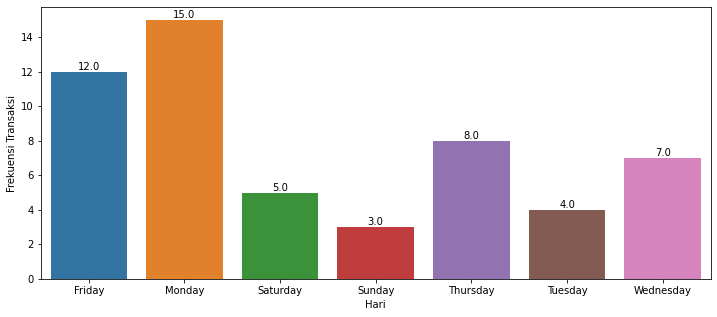

In [26]:
hari_2021 = tmp[(tmp['year']==2021) & (tmp['month']==1)].groupby(['Hari'])['ID_Transaksi'].count().reset_index()
hari_2021.rename({'ID_Transaksi':'Frekuensi Transaksi'}, inplace=True, axis=1)

plt.figure(figsize=(12,5))

ax = sns.barplot(x='Hari', y='Frekuensi Transaksi', data=hari_2021)

for p in ax.patches:
    ax.annotate(p.get_height(),
               xy = (p.get_x() + p.get_width()/2, p.get_height()),
               ha = 'center', va='bottom')

pada bulan Januari tahun 2021, transaksi paling banyak dilakukan di hari senin dengan total 15 kali transaksi

In [27]:
donasi_2022 = tmp[tmp['year']==2022].groupby(['year', 'month'])['Nominal'].sum().reset_index()
donasi_2022.rename({'Nominal':'Total Transaksi'}, inplace=True, axis=1)
donasi_2022

,year,month,Total Transaksi
0,2022,1,14608212.0


In [28]:
zakat_2022 = tmp[(tmp['year']==2022) & (tmp['month']==1)].groupby(['Category', 'Metode_Pembayaran'])['Nominal'].sum().reset_index()
zakat_2022.rename({'Nominal':'Total Donasi'}, inplace=True, axis=1)
zakat_2022

,Category,Metode_Pembayaran,Total Donasi
0,Zakat Harta,BCA,800000.0
1,Zakat Harta,MANDIRI,3000000.0
2,Zakat Harta,Mandiri Syariah,500000.0
3,Zakat Penghasilan,BCA,2400000.0
4,Zakat Penghasilan,BNI,500000.0
5,Zakat Penghasilan,Bank Transfer,20000.0
6,Zakat Penghasilan,MANDIRI,1638212.0
7,Zakat Penghasilan,PERMATA,5750000.0


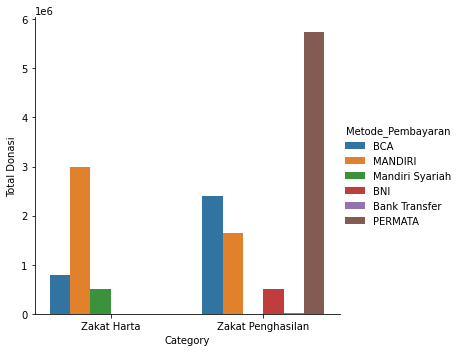

In [29]:
sns.catplot(x='Category', y='Total Donasi', hue='Metode_Pembayaran', data=zakat_2022, kind='bar')

selama tahun 2022, donasi hanya berasal dari bulan Januari sebesar 14.608.212 juta rupiah, dimana donasi tersebut sebagian besar berasal dari zakat penghasilan. dari zakat penghasilan didapatkan bahwa :
1. 5.750.000 juta rupiah berasal dari metode pembayaran Permata
2. 2.400.000 juta rupiah berasal dari metode pembayaran BCA
3. 1.638.212 juta rupiah berasal dari metode pembayaran Mandiri
4. 500.000 ribu rupiah berasal dari metode pembayaran BNI
5. 20.000 ribu rupiah berasal dari metode Bank Transfer

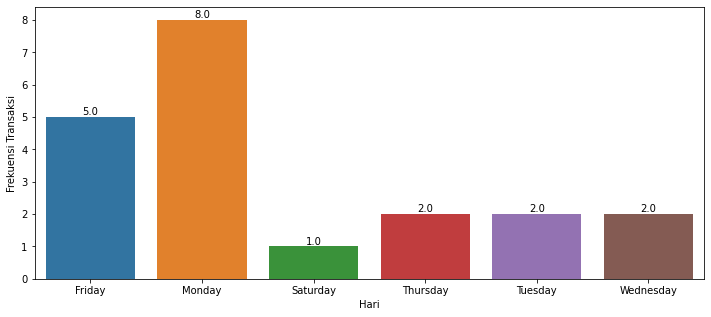

In [30]:
hari_2022 = tmp[(tmp['year']==2022) & (tmp['month']==1)].groupby(['Hari'])['ID_Transaksi'].count().reset_index()
hari_2022.rename({'ID_Transaksi':'Frekuensi Transaksi'}, inplace=True, axis=1)

plt.figure(figsize=(12,5))

ax = sns.barplot(x='Hari', y='Frekuensi Transaksi', data=hari_2022)

for p in ax.patches:
    ax.annotate(p.get_height(),
                 xy = (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va='bottom')

pada bulan Januari tahun 2022, transaksi paling banyak terjadi di hari Senin sebanyak 8 kali transaksi

In [31]:
donatur_2019 = tmp[(tmp['year']==2019) & (tmp['month']==12)].groupby(['ID_Donatur']).agg(Total_Transaksi = ('ID_Transaksi', 'count'),
                                                                                 Nominal_Transaksi = ('Nominal', 'sum')).sort_values(by=['Nominal_Transaksi'],ascending=False).reset_index()
                                                                                    
donatur_2019.head(5)

,ID_Donatur,Total_Transaksi,Nominal_Transaksi
0,26232,1,1450000.0
1,31,1,1000000.0
2,23403,1,650000.0
3,108,1,500000.0
4,23,1,300000.0


In [32]:
donatur_2019.tail(5)

,ID_Donatur,Total_Transaksi,Nominal_Transaksi
17,66,1,125000.0
18,106,1,100000.0
19,54,1,20000.0
20,22,2,200.0
21,3,1,100.0


1. Pada tahun 2019 bulan Desember donatur paling royal yaitu dengan ID_Donatur 26232 mendonasikan uangnya sebanyak 1 kali transaksi sebesar 1.450.000 juta rupiah
2. Pada tahun 2019 bulan Desember Donatur yang paling tidak royal yaitu dengan ID_Donatur 3 mendonasikan uangnya sebanyak 1 kali transaksi 100 rupiah

In [33]:
filter_tmp = tmp.loc[(tmp['year']==2020) & (tmp['month']<7)]
data_2020_6 = filter_tmp.groupby(['ID_Donatur']).agg(Total_Transaksi=('ID_Donatur', 'count'),
            Nominal_Transaksi=('Nominal', 'sum')).reset_index().sort_values(by=['Nominal_Transaksi'], ascending=False)

In [34]:
data_2020_6.head()

,ID_Donatur,Total_Transaksi,Nominal_Transaksi
28,23941,10,5900000.0
145,28150,1,5000812.0
98,27242,1,5000000.0
163,28868,1,5000000.0
146,28232,1,5000000.0


In [35]:
data_2020_6.tail()

,ID_Donatur,Total_Transaksi,Nominal_Transaksi
164,28913,1,30000.0
2,13,2,25100.0
5,54,1,20000.0
0,3,4,400.0
66,26229,1,1.0


1. Pada tahun 2020 untuk 6 bulan di awal (Januari - Juni), donatur paling royal adalah ID_Donatur 23941 dengan 10x transaksi dengan jumlah transaksi sebesar 5.900.000
2. pada tahun 2020 untuk 6 bulan di awal (Januari - Juni), donatur paling tidak royal adalah ID_Donatur 26229 dengan 1x transaksi dengan jumlah transaksi sebesar 1 rupiah

In [36]:
filter_tmp = tmp.loc[(tmp['year']==2020) & (tmp['month']>=7)]
data_2020_6 = filter_tmp.groupby(['ID_Donatur']).agg(Total_Transaksi=('ID_Donatur', 'count'),
            Nominal_Transaksi=('Nominal', 'sum')).reset_index().sort_values(by=['Nominal_Transaksi'], ascending=False)

In [37]:
data_2020_6.head()

,ID_Donatur,Total_Transaksi,Nominal_Transaksi
30,26312,3,26126207.0
21,25667,2,4000000.0
53,26896,1,3525000.0
43,26724,3,2750000.0
10,23951,1,2721140.0


In [38]:
data_2020_6.tail()

,ID_Donatur,Total_Transaksi,Nominal_Transaksi
114,31871,1,25000.0
0,3,2,200.0
1,13,4,4.0
28,26229,2,2.0
96,28188,2,2.0


1. pada tahun 2020 untuk 6 bulan akhir (Juli-Desember) donatur paling royal adalah ID_Donatur 26312 dengan 3x transaksi dan total donasi sebesar 26.126.207 juta rupiah
2. pada tahun 2020 untuk 6 bulan akhir (Juli-Desember) donatur paling tidak royal yaitu ID_Donatur 26229 dan 28188 dengan 2x transaksi dan total donasi sebesar 2 rupiah

In [39]:
filter_tmp_2021 = tmp.loc[(tmp['year']==2021) & (tmp['month']<7)]
data_2021_6 = filter_tmp_2021.groupby(['ID_Donatur']).agg(Total_Transaksi=('ID_Donatur', 'count'),
            Nominal_Transaksi=('Nominal', 'sum')).reset_index().sort_values(by=['Nominal_Transaksi'], ascending=False)

In [40]:
data_2021_6.head()

,ID_Donatur,Total_Transaksi,Nominal_Transaksi
19,26312,2,22075000.0
85,34595,1,6000000.0
71,31895,1,5201250.0
83,34448,1,5000000.0
53,28050,2,4000000.0


In [41]:
data_2021_6.tail()

,ID_Donatur,Total_Transaksi,Nominal_Transaksi
80,34345,1,50000.0
61,30459,1,50000.0
90,34694,1,40000.0
21,26402,1,4.0
14,26183,2,2.0


1. Pada tahun 2021 untuk 6 bulan awal (Januari-Juni) donatur paling royal yaitu ID_Donatur 26312 dengan 2x transaksi dan total donasi sebesar 22.075.000 juta rupiah
2. Pada tahun 2021 untuk 6 bulan awal (Januari-Juli) donatur paling tidak royal yaitu ID_Donatur 26183 dengan 2x transaksi dan total donasi sebesar 2 rupiah

In [42]:
filter_tmp_2021 = tmp.loc[(tmp['year']==2021) & (tmp['month']>=7)]
data_2021_6 = filter_tmp_2021.groupby(['ID_Donatur']).agg(Total_Transaksi=('ID_Donatur', 'count'),
            Nominal_Transaksi=('Nominal', 'sum')).reset_index().sort_values(by=['Nominal_Transaksi'], ascending=False)

In [43]:
data_2021_6.head()

,ID_Donatur,Total_Transaksi,Nominal_Transaksi
16,26312,2,20730000.0
64,35529,1,10127000.0
112,36036,1,5000000.0
75,35646,4,4200000.0
56,34766,2,3000000.0


In [44]:
data_2021_6.tail()

,ID_Donatur,Total_Transaksi,Nominal_Transaksi
49,33537,1,50000.0
104,35976,1,50000.0
4,106,1,50000.0
113,36037,1,19250.0
0,19,2,2000.0


1. pada tahun 2021 untuk 6 bulan akhir (Juli-Desember) donatur paling royal yaitu ID_Donatur 26312 dengan 2x transaksi dan total donasi sebesar 20.730.000 juta rupiah
2. pada tahun 2021 untuk 6 bulan akhir (Juli-Desember) donatur paling tidak royal ID_Donatur 19 dengan 2x transaksi dan total donasi sebesar 2000 rupiah

In [45]:
donatur_2022 = tmp[tmp['year']==2022].groupby(['ID_Donatur']).agg(Total_Transaksi = ('ID_Donatur', 'count'),
                                      Total_Donasi = ('Nominal', 'sum')).reset_index().sort_values(by=['Total_Donasi'], ascending=False)

In [46]:
donatur_2022.head()

,ID_Donatur,Total_Transaksi,Total_Donasi
3,28986,2,5750000.0
15,36060,1,2000000.0
17,36064,1,1500000.0
9,35646,1,1000000.0
10,35853,1,645462.0


In [47]:
donatur_2022.tail()

,ID_Donatur,Total_Transaksi,Total_Donasi
6,33643,1,100000.0
11,35962,1,100000.0
13,36037,1,78750.0
7,35546,1,59000.0
4,31766,1,20000.0


1. pada tahun 2022 bulan Januari, donatur paling royal yaitu ID_Donatur 28986 dengan 2x transaksi dan total donasi sebesar 5.750.000 juta rupiah
2. pada tahun 2022 bulan Januari, donatur paling tidak royal yaitu ID_Donatur 31766 dengan 1x transaksi dan total donasi sebesar 20.000 rupiah

#### Data Cleansing Pt2

<AxesSubplot:xlabel='Nominal'>

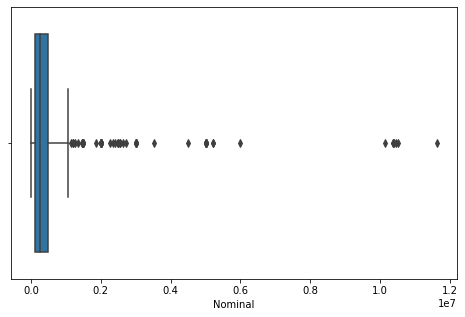

In [48]:
#cek outlier
plt.figure(figsize=(8, 5))
sns.boxplot(x='Nominal', data=data)

nilai nilai yang digambarkan outlier dirasa masih masuk akal, sehingga nilai tersebut tidak perlu dihapus

### Feature Engineering

In [49]:
#buat variabel data baru
tmp_data = data.copy()

In [50]:
tmp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_Transaksi       914 non-null    int64  
 1   ID_Donatur         914 non-null    int64  
 2   Device             914 non-null    object 
 3   Category           914 non-null    object 
 4   Tanggal            914 non-null    object 
 5   Nominal            914 non-null    float64
 6   Metode_Pembayaran  914 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [51]:
tmp_data['Tanggal_new'] = pd.to_datetime(tmp_data['Tanggal']).dt.normalize() #dt.normalize digunakan untuk hide time
tmp_data['Time'] = tmp_data['Tanggal'].apply(lambda x:pd.to_datetime(x).time())

In [52]:
#buat tabel tanggal kapan saja donatur berdonasi berdasarkan id_donatur
group_donation_date = tmp_data.groupby(['ID_Donatur'])['Tanggal_new']
#digunakan untuk mengetahui kapan donatur berdonasi pertama kali
tmp_data['First_donate_date'] = group_donation_date.transform('min')
#digunakan untuk mengetahui kapan donatur berdonasi terakhir kali
tmp_data['Last_donate_date'] = group_donation_date.transform('max')
#digunakan untuk mengetahui bulan kapan donatur berdonasi
tmp_data['Donate_month'] = tmp_data['Tanggal_new'].apply(lambda x:dt.datetime(x.year, x.month, 1))
#digunakan untuk mengetahui bulan pertama kali donatur berdonasi
tmp_data['First_donate_month'] = group_donation_date.transform('min').apply(lambda x:dt.datetime(x.year, x.month, 1))

#### RFM

##### Recency

Recency menunjukan waktu interaksi terakhir pelanggan dengan produk atau layanan Anda. Recency bisa menganalisis data mengenai transaksi terakhir pelanggan (pembelian terakhir), kunjungan ke website produk, penggunaan aplikasi mobile, hingga engagement yang pelanggan lakukan lewat media sosial (misalnya jumlah like dan SoV).

In [36]:
last_donate_max = tmp_data['Last_donate_date'].max()
last_donate_min = tmp_data['Last_donate_date'].min()

print('last donate max yaitu {} dan last donate min yaitu {}'.format(last_donate_max, last_donate_min))

last donate max yaitu 2022-01-14 00:00:00 dan last donate min yaitu 2019-12-10 00:00:00


In [37]:
tmp_data['Recency'] = tmp_data['Last_donate_date'].apply(lambda x:(last_donate_max - x).days)

##### Frequency

Metrik ini mengacu pada berapa kali pelanggan berinteraksi dengan produk atau melakukan transaksi dalam periode waktu tertentu (customer life cycle).

In [38]:
tmp_frequency = tmp_data.drop_duplicates().groupby(['ID_Donatur'], as_index=False)['ID_Transaksi'].count()
tmp_frequency.rename({'ID_Transaksi':'Frequency'}, inplace=True, axis=1)
tmp_frequency

,ID_Donatur,Frequency
0,3,7
1,12,1
2,13,6
3,14,1
4,19,2
...,...,...
496,36058,1
497,36060,1
498,36061,1
499,36064,1


##### Monetary

Metrik monetary value menunjukkan jumlah total yang pelanggan habiskan untuk membeli produk dalam periode waktu tertentu


In [39]:
tmp_monetary = tmp_data.drop_duplicates().groupby(['ID_Donatur'], as_index=False)['Nominal'].sum()
tmp_monetary.rename({'Nominal':'Monetary'}, inplace=True, axis=1)
tmp_monetary

,ID_Donatur,Monetary
0,3,700.0
1,12,75000.0
2,13,25104.0
3,14,500000.0
4,19,2000.0
...,...,...
496,36058,300000.0
497,36060,2000000.0
498,36061,180000.0
499,36064,1500000.0


In [40]:
merging_rfm = tmp_frequency.merge(tmp_monetary, on='ID_Donatur', how='inner')
merging_rfm

,ID_Donatur,Frequency,Monetary
0,3,7,700.0
1,12,1,75000.0
2,13,6,25104.0
3,14,1,500000.0
4,19,2,2000.0
...,...,...,...
496,36058,1,300000.0
497,36060,1,2000000.0
498,36061,1,180000.0
499,36064,1,1500000.0


In [41]:
merging_rfm['Recency'] = merging_rfm['ID_Donatur'].map(dict(zip(tmp_data['ID_Donatur'], tmp_data['Recency'])))
merging_rfm

,ID_Donatur,Frequency,Monetary,Recency
0,3,7,700.0,550
1,12,1,75000.0,737
2,13,6,25104.0,536
3,14,1,500000.0,741
4,19,2,2000.0,87
...,...,...,...,...
496,36058,1,300000.0,11
497,36060,1,2000000.0,11
498,36061,1,180000.0,8
499,36064,1,1500000.0,6


In [42]:
#top 30% recency,frequency, monetary
print('top 30% recency yaitu: {}'.format(np.percentile(merging_rfm['Recency'], 30)))
print('top 30% frequency yaitu: {}'.format(np.percentile(merging_rfm['Frequency'], 70)))
print('top 30% monetary yaitu: {}'.format(np.percentile(merging_rfm['Monetary'], 70)))

top_30 = merging_rfm.loc[(merging_rfm['Recency']<=np.percentile(merging_rfm['Recency'], 30))\
                         &(merging_rfm['Frequency']>=np.percentile(merging_rfm['Frequency'], 70))\
                         &(merging_rfm['Monetary']>=np.percentile(merging_rfm['Monetary'], 70))]
top_30 = top_30.sort_values(by=['Recency'], ascending=True)
top_30

top 30% recency yaitu: 267.0
top 30% frequency yaitu: 2.0
top 30% monetary yaitu: 700000.0


,ID_Donatur,Frequency,Monetary,Recency
486,35999,4,2000000.0,0
363,32679,3,1156275.0,0
295,28986,2,5750000.0,0
214,27315,2,3500000.0,0
472,35853,4,2937836.0,4
43,23665,4,1070000.0,7
454,35646,5,5200000.0,11
78,25195,6,1675000.0,11
446,35570,4,1600000.0,11
461,35719,4,800000.0,14


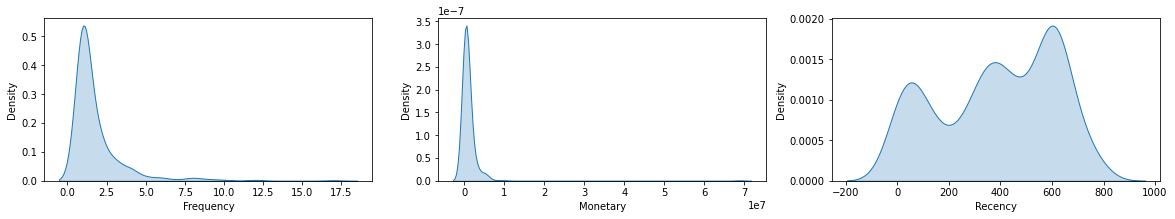

In [45]:
#cek normality
cols = ['Frequency', 'Monetary', 'Recency']
plt.figure(figsize=(20,3))
for x in range(len(merging_rfm[cols].columns)):
    plt.subplot(1,3,x+1)
    sns.kdeplot(x=merging_rfm[cols].columns[x], data=merging_rfm, shade=True)

Data Frequency mengalami skew dan akan mempengaruhi segmentasi pada rfm, oleh karena itu untuk scoring gunakan unsupervised learning

##### Unsupervised Learning

In [46]:
#Ekstraksi data
data_freq = merging_rfm['Frequency'].values.tolist()
indexing = merging_rfm.index

In [47]:
import kmeans1d

In [48]:
k=3
clusters,_ = kmeans1d.cluster(data_freq, k)

In [49]:
merging_rfm = pd.concat([merging_rfm, pd.DataFrame(clusters, index=indexing, columns=['Frequency_Score'])], axis=1)
merging_rfm

,ID_Donatur,Frequency,Monetary,Recency,Frequency_Score
0,3,7,700.0,550,2
1,12,1,75000.0,737,0
2,13,6,25104.0,536,1
3,14,1,500000.0,741,0
4,19,2,2000.0,87,0
...,...,...,...,...,...
496,36058,1,300000.0,11,0
497,36060,1,2000000.0,11,0
498,36061,1,180000.0,8,0
499,36064,1,1500000.0,6,0


In [50]:
merging_rfm[merging_rfm['Frequency_Score']==0].describe()

,ID_Donatur,Frequency,Monetary,Recency,Frequency_Score
count,413.000000,413.000000,4.130000e+02,413.000000,413.0
mean,28261.099274,1.193705,6.547406e+05,416.384988,0.0
std,7699.031319,0.395679,1.120814e+06,218.928468,0.0
min,12.000000,1.000000,2.000000e+00,0.000000,0.0
25%,26717.000000,1.000000,1.450000e+05,289.000000,0.0
50%,28277.000000,1.000000,3.000000e+05,445.000000,0.0
75%,34198.000000,1.000000,5.500000e+05,603.000000,0.0
max,36069.000000,2.000000,1.012700e+07,766.000000,0.0


In [51]:
merging_rfm[merging_rfm['Frequency_Score']==1].describe()

,ID_Donatur,Frequency,Monetary,Recency,Frequency_Score
count,72.000000,72.000000,7.200000e+01,72.000000,72.0
mean,26989.083333,3.763889,1.579104e+06,247.458333,1.0
std,9015.434588,0.941875,1.596559e+06,215.954216,0.0
min,13.000000,3.000000,3.000000e+00,0.000000,1.0
25%,26308.500000,3.000000,5.826625e+05,36.500000,1.0
50%,27527.500000,3.500000,1.135138e+06,201.000000,1.0
75%,31855.750000,4.000000,1.921250e+06,469.500000,1.0
max,36019.000000,6.000000,8.500000e+06,620.000000,1.0


In [52]:
merging_rfm[merging_rfm['Frequency_Score']==2].describe()

,ID_Donatur,Frequency,Monetary,Recency,Frequency_Score
count,16.00000,16.000000,1.600000e+01,16.000000,16.0
mean,20858.31250,9.375000,6.436161e+06,276.937500,2.0
std,10384.25786,2.526526,1.674623e+07,200.986391,0.0
min,3.00000,7.000000,7.000000e+02,22.000000,2.0
25%,23927.25000,8.000000,1.187500e+06,99.000000,2.0
50%,25457.00000,8.500000,2.060014e+06,256.500000,2.0
75%,26326.75000,10.000000,3.138730e+06,428.000000,2.0
max,27114.00000,17.000000,6.893121e+07,603.000000,2.0


In [53]:
#cek monetary
print('quartile 25 monetary yaitu: {}'.format(np.percentile(merging_rfm['Monetary'], 25)))
print('quartile 50 monetary yaitu: {}'.format(np.percentile(merging_rfm['Monetary'], 50)))
print('quartile 75 monetary yaitu: {}'.format(np.percentile(merging_rfm['Monetary'], 75)))

quartile 25 monetary yaitu: 150000.0
quartile 50 monetary yaitu: 350000.0
quartile 75 monetary yaitu: 897500.0


In [54]:
def score_rfm(df, col, newcol):
    percentile = np.percentile(df[col], [0,30,70,100])
    if col == 'Monetary':
        df[newcol] = pd.cut(df[col], percentile, labels=[1, 2, 3], include_lowest=True)
        return df
    if col == 'Recency':
        df[newcol] = pd.cut(df[col], percentile, labels=[3, 2, 1], include_lowest=True)
        return df

In [55]:
merging_rfm = score_rfm(merging_rfm, 'Monetary', 'Monetary_Score')
merging_rfm = score_rfm(merging_rfm, 'Recency', 'Recency_Score')

In [56]:
merging_rfm.head(3)

,ID_Donatur,Frequency,Monetary,Recency,Frequency_Score,Monetary_Score,Recency_Score
0,3,7,700.0,550,2,1,2
1,12,1,75000.0,737,0,1,1
2,13,6,25104.0,536,1,1,2


In [57]:
#ubah type monetary score dan recency score menjadi int64
for x in ['Monetary_Score', 'Recency_Score']:
    merging_rfm[x] = merging_rfm[x].astype('int64')

# ubah 0->1,1->2,2->3 untuk frequency score
dict_clus = {0:1,
             1:2,
             2:3}
merging_rfm['Frequency_Score'] = merging_rfm['Frequency_Score'].map(dict_clus)

In [193]:
merging_rfm[merging_rfm['Recency_Score']==1].describe()

,ID_Donatur,Frequency,Monetary,Recency,Frequency_Score,Monetary_Score,Recency_Score
count,150.000000,150.000000,1.500000e+02,150.000000,150.000000,150.000000,150.0
mean,24129.840000,1.240000,6.770775e+05,637.306667,1.040000,1.680000,1.0
std,8790.154797,0.887497,1.191547e+06,49.651530,0.228212,0.788508,0.0
min,12.000000,1.000000,2.000000e+02,601.000000,1.000000,1.000000,1.0
25%,24996.000000,1.000000,1.000000e+05,603.000000,1.000000,1.000000,1.0
50%,27363.000000,1.000000,2.000000e+05,610.500000,1.000000,1.000000,1.0
75%,28763.750000,1.000000,5.000000e+05,652.750000,1.000000,2.000000,1.0
max,29151.000000,10.000000,5.900000e+06,766.000000,3.000000,3.000000,1.0


In [194]:
merging_rfm[merging_rfm['Recency_Score']==3].describe()

,ID_Donatur,Frequency,Monetary,Recency,Frequency_Score,Monetary_Score,Recency_Score
count,151.000000,151.000000,1.510000e+02,151.000000,151.000000,151.000000,151.0
mean,31035.728477,2.529801,1.585119e+06,92.390728,1.390728,2.225166,3.0
std,7430.356692,2.259227,5.738048e+06,80.995471,0.588484,0.776077,0.0
min,19.000000,1.000000,2.000000e+03,0.000000,1.000000,1.000000,3.0
25%,27559.000000,1.000000,2.500000e+05,22.000000,1.000000,2.000000,3.0
50%,34281.000000,2.000000,5.100000e+05,70.000000,1.000000,2.000000,3.0
75%,35757.000000,3.000000,1.381565e+06,143.500000,2.000000,3.000000,3.0
max,36069.000000,17.000000,6.893121e+07,267.000000,3.000000,3.000000,3.0


In [195]:
merging_rfm[merging_rfm['Monetary_Score']==1].describe()

,ID_Donatur,Frequency,Monetary,Recency,Frequency_Score,Monetary_Score,Recency_Score
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.0,176.000000
mean,27684.886364,1.261364,119003.744318,450.551136,1.045455,1.0,1.738636
std,8044.107040,0.785502,56177.737065,203.615598,0.234659,0.0,0.748245
min,3.000000,1.000000,2.000000,3.000000,1.000000,1.0,1.000000
25%,26298.500000,1.000000,94650.000000,323.750000,1.000000,1.0,1.000000
50%,28444.000000,1.000000,110000.000000,521.500000,1.000000,1.0,2.000000
75%,33248.500000,1.000000,150500.000000,603.250000,1.000000,1.0,2.000000
max,36069.000000,7.000000,200000.000000,751.000000,3.000000,1.0,3.000000


In [196]:
merging_rfm[merging_rfm['Monetary_Score']==3].describe()

,ID_Donatur,Frequency,Monetary,Recency,Frequency_Score,Monetary_Score,Recency_Score
count,147.000000,147.000000,1.470000e+02,147.000000,147.000000,147.0,147.000000
mean,28250.095238,2.952381,2.674922e+06,319.959184,1.537415,3.0,2.244898
std,7392.454086,2.662097,5.755540e+06,235.564605,0.664894,0.0,0.772754
min,31.000000,1.000000,7.050000e+05,0.000000,1.000000,3.0,1.000000
25%,26782.000000,1.000000,1.000000e+06,78.000000,1.000000,3.0,2.000000
50%,27685.000000,2.000000,1.585000e+06,333.000000,1.000000,3.0,2.000000
75%,33893.500000,4.000000,2.843918e+06,564.000000,2.000000,3.0,3.000000
max,36064.000000,17.000000,6.893121e+07,731.000000,3.000000,3.0,3.000000


In [58]:
# Donatur Segmentation
for index, cols in merging_rfm.iterrows():
    if cols['Recency_Score']==3:
        if cols['Frequency_Score']==3:
            if cols['Monetary_Score']==3:
                merging_rfm.loc[index, 'segmentation'] = 'Loyal Customer'
            elif cols['Monetary_Score']==2:
                merging_rfm.loc[index, 'segmentation'] = 'Loyal Customer'
            else:
                merging_rfm.loc[index, 'segmentation'] = 'Loyal Customer'
        if cols['Frequency_Score']==2:
            if cols['Monetary_Score']==3:
                merging_rfm.loc[index, 'segmentation'] = 'Loyal Customer'
            elif cols['Monetary_Score']==2:
                merging_rfm.loc[index, 'segmentation'] = 'Casual Customer'
            else:
                merging_rfm.loc[index, 'segmentation'] = 'Need Attention' 
        if cols['Frequency_Score']==1:
            if cols['Monetary_Score']==3:
                merging_rfm.loc[index, 'segmentation'] = 'Need Attention'
            elif cols['Monetary_Score']==2:
                merging_rfm.loc[index, 'segmentation'] = 'Need Attention'
            else:
                merging_rfm.loc[index, 'segmentation'] = 'Need Attention'
    if cols['Recency_Score']==2:
        if cols['Frequency_Score']==3:
            if cols['Monetary_Score']==3:
                merging_rfm.loc[index, 'segmentation'] = 'Loyal Customer'
            elif cols['Monetary_Score']==2:
                merging_rfm.loc[index, 'segmentation'] = 'Loyal Customer'
            else:
                merging_rfm.loc[index, 'segmentation'] = 'Casual Customer'
        if cols['Frequency_Score']==2:
            if cols['Monetary_Score']==3:
                merging_rfm.loc[index, 'segmentation'] = 'Casual Customer'
            elif cols['Monetary_Score']==2:
                merging_rfm.loc[index, 'segmentation'] = 'Casual Customer'
            else:
                merging_rfm.loc[index, 'segmentation'] = 'About to Sleep'
        if cols['Frequency_Score']==1:
            if cols['Monetary_Score']==3:
                merging_rfm.loc[index, 'segmentation'] = 'Need Attention'
            elif cols['Monetary_Score']==2:
                merging_rfm.loc[index, 'segmentation'] = 'Need Attention'
            else:
                merging_rfm.loc[index, 'segmentation'] = 'About to Sleep'
    if cols['Recency_Score']==1:
        if cols['Frequency_Score']==3:
            if cols['Monetary_Score']==3:
                merging_rfm.loc[index, 'segmentation'] = 'Need Attention'
            elif cols['Monetary_Score']==2:
                merging_rfm.loc[index, 'segmentation'] = 'Need Attention'
            else:
                merging_rfm.loc[index, 'segmentation'] = 'About to Sleep'
        if cols['Frequency_Score']==2:
            if cols['Monetary_Score']==3:
                merging_rfm.loc[index, 'segmentation'] = 'Need Attention'
            elif cols['Monetary_Score']==2:
                merging_rfm.loc[index, 'segmentation'] = 'Need Attention'
            else:
                merging_rfm.loc[index, 'segmentation'] = 'About to Sleep' 
        if cols['Frequency_Score']==1:
            if cols['Monetary_Score']==3:
                merging_rfm.loc[index, 'segmentation'] = 'About to Sleep'
            elif cols['Monetary_Score']==2:
                merging_rfm.loc[index, 'segmentation'] = 'About to Sleep'
            else:
                merging_rfm.loc[index, 'segmentation'] = 'About to Sleep'      
        

In [59]:
merging_rfm.head()

,ID_Donatur,Frequency,Monetary,Recency,Frequency_Score,Monetary_Score,Recency_Score,segmentation
0,3,7,700.0,550,3,1,2,Casual Customer
1,12,1,75000.0,737,1,1,1,About to Sleep
2,13,6,25104.0,536,2,1,2,About to Sleep
3,14,1,500000.0,741,1,2,1,About to Sleep
4,19,2,2000.0,87,1,1,3,Need Attention


In [60]:
merging_rfm = merging_rfm[['ID_Donatur', 'Frequency', 'Monetary', 'Recency'
                          ,'Recency_Score', 'Frequency_Score', 'Monetary_Score', 'segmentation']]
merging_rfm.head()

,ID_Donatur,Frequency,Monetary,Recency,Recency_Score,Frequency_Score,Monetary_Score,segmentation
0,3,7,700.0,550,2,3,1,Casual Customer
1,12,1,75000.0,737,1,1,1,About to Sleep
2,13,6,25104.0,536,2,2,1,About to Sleep
3,14,1,500000.0,741,1,1,2,About to Sleep
4,19,2,2000.0,87,3,1,1,Need Attention


In [61]:
total_segment = merging_rfm.groupby(['segmentation']).agg(jumlah_donatur = ('ID_Donatur', 'count')).reset_index()\
                                                     .sort_values(by=['jumlah_donatur'], ascending=False)
total_segment.head()

,segmentation,jumlah_donatur
0,About to Sleep,213
3,Need Attention,208
2,Loyal Customer,49
1,Casual Customer,31


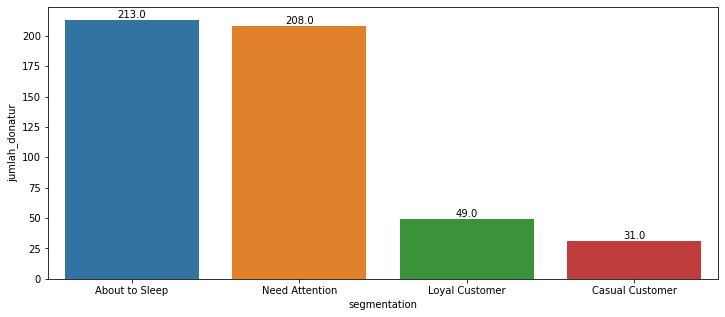

In [62]:
plt.figure(figsize=(12,5))

ax = sns.barplot(x='segmentation', y='jumlah_donatur', data=total_segment)

for p in ax.patches:
    ax.annotate(p.get_height(),
                 xy = (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va='bottom')

In [63]:
merging_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_Donatur       501 non-null    int64  
 1   Frequency        501 non-null    int64  
 2   Monetary         501 non-null    float64
 3   Recency          501 non-null    int64  
 4   Recency_Score    501 non-null    int64  
 5   Frequency_Score  501 non-null    int64  
 6   Monetary_Score   501 non-null    int64  
 7   segmentation     501 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 51.4+ KB


In [64]:
tmp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID_Transaksi        914 non-null    int64         
 1   ID_Donatur          914 non-null    int64         
 2   Nama_Donatur        914 non-null    object        
 3   Device              914 non-null    object        
 4   Category            914 non-null    object        
 5   Tanggal             914 non-null    object        
 6   Nominal             914 non-null    float64       
 7   Metode_Pembayaran   914 non-null    object        
 8   Tanggal_new         914 non-null    datetime64[ns]
 9   Time                914 non-null    object        
 10  First_donate_date   914 non-null    datetime64[ns]
 11  Last_donate_date    914 non-null    datetime64[ns]
 12  Donate_month        914 non-null    datetime64[ns]
 13  First_donate_month  914 non-null    datetime64[ns]

In [65]:
#menghasilkan value device pada merging_rfm
dev = []
for x in merging_rfm['ID_Donatur']:
    dev.append(tmp_data.drop_duplicates()[tmp_data['ID_Donatur']==x]['Device'].mode()[0])
    
#menghasilkan value zakat pada merging_rfm
zakat = []
for x in merging_rfm['ID_Donatur']:
    zakat.append(tmp_data.drop_duplicates()[tmp_data['ID_Donatur']==x]['Category'].mode()[0])
    
#menghasilkan value metode bayar pada merging_rfm
metode_bayar = []
for x in merging_rfm['ID_Donatur']:
    metode_bayar.append(tmp_data.drop_duplicates()[tmp_data['ID_Donatur']==x]['Metode_Pembayaran'].mode()[0])

In [66]:
#menggabungkan list dev ke dataframe
merging_rfm = pd.concat([merging_rfm, pd.DataFrame(dev, columns=['Device'], index=merging_rfm.index)],axis=1)

#menggabungkan list zakat ke dataframe
merging_rfm = pd.concat([merging_rfm, pd.DataFrame(zakat, columns=['Zakat'], index=merging_rfm.index)],axis=1)

#menggabungkan list metode bayar pada merging_rfm
merging_rfm = pd.concat([merging_rfm, pd.DataFrame(metode_bayar, columns=['Metode_Pembayaran'], index=merging_rfm.index)],axis=1)

In [67]:
merging_rfm.head(3)

,ID_Donatur,Frequency,Monetary,Recency,Recency_Score,Frequency_Score,Monetary_Score,segmentation,Device,Zakat,Metode_Pembayaran
0,3,7,700.0,550,2,3,1,Casual Customer,Android,Zakat Penghasilan,Gopay
1,12,1,75000.0,737,1,1,1,About to Sleep,Tidak_Diketahui,Zakat Penghasilan,MANDIRI
2,13,6,25104.0,536,2,2,1,About to Sleep,Tidak_Diketahui,Zakat Penghasilan,Gopay


In [68]:
#menghasilkan list yang berisi selisih tanggal transaksi akhir dengan transaksi awal berdasarkan ID Donatur
value = []
for x in merging_rfm['ID_Donatur']:
    nilai = tmp_data[tmp_data['ID_Donatur']==x]['Tanggal_new'].max() - tmp_data[tmp_data['ID_Donatur']==x]['Tanggal_new'].min()
    nilai = int(nilai/np.timedelta64(1, 'D'))
    value.append(nilai)
    
#menggabungkan merging_rfm dengan list value
merging_rfm = pd.concat([merging_rfm, pd.DataFrame(value, 
              columns=['Jarak transaksi pertama dengan terkahir'], index=merging_rfm.index)],axis=1)

#mengubah value kolom 'Jarak transaksi pertama dengan terakhir' yang 0 dengan value colomn recency
for index, cols in merging_rfm.iterrows():
    if cols['Jarak transaksi pertama dengan terkahir'] == 0:
        merging_rfm.loc[index, 'Jarak transaksi pertama dengan terkahir'] = cols['Recency']

In [69]:
merging_rfm.head(3)

,ID_Donatur,Frequency,Monetary,Recency,Recency_Score,Frequency_Score,Monetary_Score,segmentation,Device,Zakat,Metode_Pembayaran,Jarak transaksi pertama dengan terkahir
0,3,7,700.0,550,2,3,1,Casual Customer,Android,Zakat Penghasilan,Gopay,202
1,12,1,75000.0,737,1,1,1,About to Sleep,Tidak_Diketahui,Zakat Penghasilan,MANDIRI,737
2,13,6,25104.0,536,2,2,1,About to Sleep,Tidak_Diketahui,Zakat Penghasilan,Gopay,86


In [70]:
#buat data target dimana 0 jika frekuensi donasi = 1, dan 1 jika frequensi >=2

for index, cols in merging_rfm.iterrows():
    if cols['Frequency'] == 1:
        merging_rfm.loc[index, 'Frekuensi_Donasi'] = 0
    elif cols['Frequency'] >=2:
        merging_rfm.loc[index, 'Frekuensi_Donasi'] = 1
        
#ubah type data kolom frekuensi donasi dari float kadi int
merging_rfm['Frekuensi_Donasi'] = merging_rfm['Frekuensi_Donasi'].astype('int64')

In [71]:
merging_rfm.head(6)

,ID_Donatur,Frequency,Monetary,Recency,Recency_Score,Frequency_Score,Monetary_Score,segmentation,Device,Zakat,Metode_Pembayaran,Jarak transaksi pertama dengan terkahir,Frekuensi_Donasi
0,3,7,700.0,550,2,3,1,Casual Customer,Android,Zakat Penghasilan,Gopay,202,1
1,12,1,75000.0,737,1,1,1,About to Sleep,Tidak_Diketahui,Zakat Penghasilan,MANDIRI,737,0
2,13,6,25104.0,536,2,2,1,About to Sleep,Tidak_Diketahui,Zakat Penghasilan,Gopay,86,1
3,14,1,500000.0,741,1,1,2,About to Sleep,Tidak_Diketahui,Zakat Penghasilan,Bank Transfer,741,0
4,19,2,2000.0,87,3,1,1,Need Attention,CFD v2,Zakat Penghasilan,Gopay,87,1
5,20,3,465000.0,14,3,2,2,Casual Customer,CFD v2,Zakat Penghasilan,MANDIRI,56,1


#### Feature Engineering Pt.3

In [72]:
df = merging_rfm.copy()
df.head()

,ID_Donatur,Frequency,Monetary,Recency,Recency_Score,Frequency_Score,Monetary_Score,segmentation,Device,Zakat,Metode_Pembayaran,Jarak transaksi pertama dengan terkahir,Frekuensi_Donasi
0,3,7,700.0,550,2,3,1,Casual Customer,Android,Zakat Penghasilan,Gopay,202,1
1,12,1,75000.0,737,1,1,1,About to Sleep,Tidak_Diketahui,Zakat Penghasilan,MANDIRI,737,0
2,13,6,25104.0,536,2,2,1,About to Sleep,Tidak_Diketahui,Zakat Penghasilan,Gopay,86,1
3,14,1,500000.0,741,1,1,2,About to Sleep,Tidak_Diketahui,Zakat Penghasilan,Bank Transfer,741,0
4,19,2,2000.0,87,3,1,1,Need Attention,CFD v2,Zakat Penghasilan,Gopay,87,1


In [73]:
df = df.drop(['Frequency', 'Frequency_Score'], axis=1)
df.head(1)

,ID_Donatur,Monetary,Recency,Recency_Score,Monetary_Score,segmentation,Device,Zakat,Metode_Pembayaran,Jarak transaksi pertama dengan terkahir,Frekuensi_Donasi
0,3,700.0,550,2,1,Casual Customer,Android,Zakat Penghasilan,Gopay,202,1


In [74]:
# label encoder
def nominal(df,col):
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummies], axis=1)
    return df

df = nominal(df, 'Device')
df = nominal(df, 'Zakat')
df = nominal(df, 'Metode_Pembayaran')

#drop kolom yang kolomnya dijadikan dasar untuk encode
cols = ['Device', 'Zakat', 'Metode_Pembayaran']
for x in cols:
    df = df.drop(x, axis=1)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 32 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID_Donatur                               501 non-null    int64  
 1   Monetary                                 501 non-null    float64
 2   Recency                                  501 non-null    int64  
 3   Recency_Score                            501 non-null    int64  
 4   Monetary_Score                           501 non-null    int64  
 5   segmentation                             501 non-null    object 
 6   Jarak transaksi pertama dengan terkahir  501 non-null    int64  
 7   Frekuensi_Donasi                         501 non-null    int64  
 8   Device_Android                           501 non-null    uint8  
 9   Device_CFD v2                            501 non-null    uint8  
 10  Device_PWA                               501 non-n

In [76]:
# Scalling Data

#hasilkan value ID_Donatur dan drop ID_Donatur dari tmp_data
ID_Donatur = df['ID_Donatur']
df = df.drop(['ID_Donatur'], axis=1)

# Scalling all dataset
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df.iloc[:, :2] = ss.fit_transform(df.iloc[:, :2])
df.iloc[:, 5:6] = ss.fit_transform(df.iloc[:, 5:6])

In [77]:
#bagi data menjadi 2 yaitu train ('loyal customer, 'casual customer, 'about to sleep') dan 
# test (need attention)
data_train = pd.DataFrame(columns=df.columns)
data_test = pd.DataFrame(columns=df.columns)
for x in df['segmentation'].unique():
    if x != 'Need Attention':
        data_train = data_train.append(df[df['segmentation']==x])
    elif x == 'Need Attention':
        data_test = data_test.append(df[df['segmentation']==x])

In [78]:
data_test

,Monetary,Recency,Recency_Score,Monetary_Score,segmentation,Jarak transaksi pertama dengan terkahir,Frekuensi_Donasi,Device_Android,Device_CFD v2,Device_PWA,...,Metode_Pembayaran_Bank Transfer,Metode_Pembayaran_DANA,Metode_Pembayaran_Gopay,Metode_Pembayaran_MANDIRI,Metode_Pembayaran_Mandiri Syariah,Metode_Pembayaran_Muamalat,Metode_Pembayaran_OVO,Metode_Pembayaran_PERMATA,Metode_Pembayaran_credit_card,Metode_Pembayaran_echannel
4,-0.294140,-1.329623,3,1,Need Attention,-1.235406,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
13,-0.203796,-1.219062,3,2,Need Attention,1.189285,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
17,-0.232294,-0.188637,2,2,Need Attention,0.132032,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
28,-0.143111,-0.613190,3,2,Need Attention,-0.527659,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
29,-0.249271,-0.847578,3,1,Need Attention,0.900944,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,-0.203796,-1.665727,3,2,Need Attention,-1.567436,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0.311591,-1.665727,3,3,Need Attention,-1.567436,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,-0.240176,-1.678994,3,1,Need Attention,-1.580543,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
499,0.160007,-1.687839,3,3,Need Attention,-1.589280,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [79]:
data_train

,Monetary,Recency,Recency_Score,Monetary_Score,segmentation,Jarak transaksi pertama dengan terkahir,Frekuensi_Donasi,Device_Android,Device_CFD v2,Device_PWA,...,Metode_Pembayaran_Bank Transfer,Metode_Pembayaran_DANA,Metode_Pembayaran_Gopay,Metode_Pembayaran_MANDIRI,Metode_Pembayaran_Mandiri Syariah,Metode_Pembayaran_Muamalat,Metode_Pembayaran_OVO,Metode_Pembayaran_PERMATA,Metode_Pembayaran_credit_card,Metode_Pembayaran_echannel
0,-0.294534,0.717960,2,1,Casual Customer,-0.732993,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
5,-0.153773,-1.652460,3,2,Casual Customer,-1.370840,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
10,0.463175,-0.436293,2,3,Casual Customer,0.411636,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
15,0.199267,0.669313,2,3,Casual Customer,-1.292201,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
16,-0.116445,0.651624,2,2,Casual Customer,-0.636879,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,-0.067370,-1.462295,3,3,Loyal Customer,-1.558699,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
461,-0.052212,-1.652460,3,3,Loyal Customer,-1.095604,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
469,0.023581,-1.502097,3,3,Loyal Customer,-1.397052,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
472,0.595914,-1.696684,3,3,Loyal Customer,-1.274726,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [80]:
#dari data train dan test kita drop kolom segmentation
data_train = data_train.drop(['segmentation'], axis=1)
data_test = data_test.drop(['segmentation'], axis=1)

In [81]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 4 to 500
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Monetary                                 208 non-null    float64
 1   Recency                                  208 non-null    float64
 2   Recency_Score                            208 non-null    object 
 3   Monetary_Score                           208 non-null    object 
 4   Jarak transaksi pertama dengan terkahir  208 non-null    float64
 5   Frekuensi_Donasi                         208 non-null    object 
 6   Device_Android                           208 non-null    object 
 7   Device_CFD v2                            208 non-null    object 
 8   Device_PWA                               208 non-null    object 
 9   Device_Tidak_Diketahui                   208 non-null    object 
 10  Device_WA                                208 non-n

In [82]:
#cek jumlah value 0 & 1 di kolom frekuensi donasi pada data train
data_train['Frekuensi_Donasi'].value_counts()

0    185
1    108
Name: Frekuensi_Donasi, dtype: int64

In [83]:
data_test['Frekuensi_Donasi'].value_counts()

0    148
1     60
Name: Frekuensi_Donasi, dtype: int64

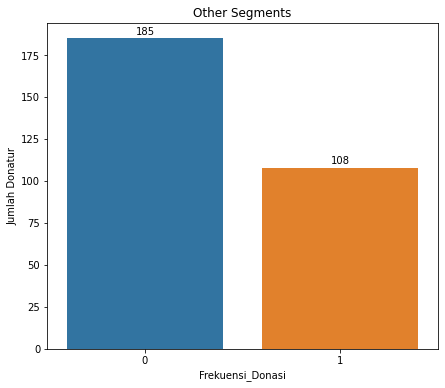

In [106]:
plt.figure(figsize=(7,6))
ax = sns.countplot(x='Frekuensi_Donasi', data=data_train)
plt.title('Other Segments')
plt.ylabel('Jumlah Donatur')

for x in ax.patches:
        height = x.get_height()
        ax.annotate('{}'.format(height), 
                xy=(x.get_x() + x.get_width() / 2, height),
                xytext=(0, 2),  
                textcoords='offset points',
                ha='center', 
                va='bottom',
                fontsize=10)

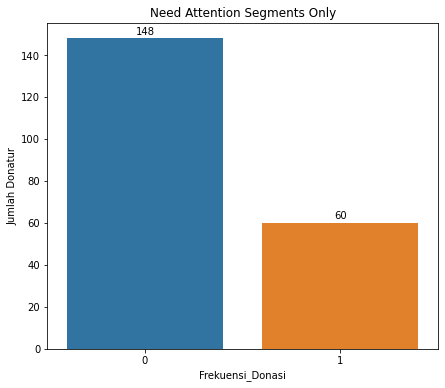

In [107]:
plt.figure(figsize=(7,6))
ax = sns.countplot(x='Frekuensi_Donasi', data=data_test)
plt.title('Need Attention Segments Only')
plt.ylabel('Jumlah Donatur')

for x in ax.patches:
        height = x.get_height()
        ax.annotate('{}'.format(height), 
                xy=(x.get_x() + x.get_width() / 2, height),
                xytext=(0, 2),  
                textcoords='offset points',
                ha='center', 
                va='bottom',
                fontsize=10)

In [101]:
#mengambil data 10 data yang kolom frekuensi donasi bernilai 1
data_1 = pd.DataFrame(columns=data_test.columns)
for index, cols in data_test.iterrows():
    if data_test.loc[index,'Frekuensi_Donasi'] == 1:
        data_1 = data_1.append(data_test.loc[[index]])
        if len(data_1) == 10:
            break

In [102]:
data_1

,Monetary,Recency,Recency_Score,Monetary_Score,Jarak transaksi pertama dengan terkahir,Frekuensi_Donasi,Device_Android,Device_CFD v2,Device_PWA,Device_Tidak_Diketahui,...,Metode_Pembayaran_Bank Transfer,Metode_Pembayaran_DANA,Metode_Pembayaran_Gopay,Metode_Pembayaran_MANDIRI,Metode_Pembayaran_Mandiri Syariah,Metode_Pembayaran_Muamalat,Metode_Pembayaran_OVO,Metode_Pembayaran_PERMATA,Metode_Pembayaran_credit_card,Metode_Pembayaran_echannel
4,-0.294140,-1.329623,3,1,-1.235406,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
13,-0.203796,-1.219062,3,2,1.189285,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17,-0.232294,-0.188637,2,2,0.132032,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
29,-0.249271,-0.847578,3,1,0.900944,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
37,-0.044632,0.779874,2,3,-1.449478,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
42,-0.228049,1.027530,1,2,-1.458216,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
48,1.493950,0.952348,1,3,1.018902,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
65,-0.203796,0.089976,2,2,-1.353364,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
70,-0.170447,0.872745,2,2,-1.541223,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
76,-0.082528,-1.510942,3,2,-0.400963,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [103]:
data_join = pd.concat([data_train, data_1], axis=0)
data_join

,Monetary,Recency,Recency_Score,Monetary_Score,Jarak transaksi pertama dengan terkahir,Frekuensi_Donasi,Device_Android,Device_CFD v2,Device_PWA,Device_Tidak_Diketahui,...,Metode_Pembayaran_Bank Transfer,Metode_Pembayaran_DANA,Metode_Pembayaran_Gopay,Metode_Pembayaran_MANDIRI,Metode_Pembayaran_Mandiri Syariah,Metode_Pembayaran_Muamalat,Metode_Pembayaran_OVO,Metode_Pembayaran_PERMATA,Metode_Pembayaran_credit_card,Metode_Pembayaran_echannel
0,-0.294534,0.717960,2,1,-0.732993,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,-0.153773,-1.652460,3,2,-1.370840,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
10,0.463175,-0.436293,2,3,0.411636,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
15,0.199267,0.669313,2,3,-1.292201,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16,-0.116445,0.651624,2,2,-0.636879,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,-0.228049,1.027530,1,2,-1.458216,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
48,1.493950,0.952348,1,3,1.018902,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
65,-0.203796,0.089976,2,2,-1.353364,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
70,-0.170447,0.872745,2,2,-1.541223,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


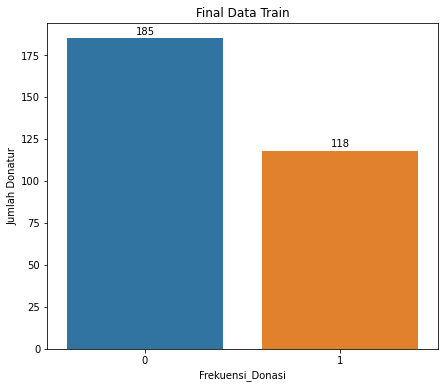

In [108]:
plt.figure(figsize=(7,6))
ax = sns.countplot(x='Frekuensi_Donasi', data=data_join)
plt.title('Final Data Train')
plt.ylabel('Jumlah Donatur')

for x in ax.patches:
        height = x.get_height()
        ax.annotate('{}'.format(height), 
                xy=(x.get_x() + x.get_width() / 2, height),
                xytext=(0, 2),  
                textcoords='offset points',
                ha='center', 
                va='bottom',
                fontsize=10)

### Machine Learning

##### Splitting Data Train

In [287]:
tmp_data_1 = data_join.copy()
tmp_data_1.head()

,Monetary,Recency,Recency_Score,Monetary_Score,Jarak transaksi pertama dengan terkahir,Frekuensi_Donasi,Device_Android,Device_CFD v2,Device_PWA,Device_Tidak_Diketahui,...,Metode_Pembayaran_Bank Transfer,Metode_Pembayaran_DANA,Metode_Pembayaran_Gopay,Metode_Pembayaran_MANDIRI,Metode_Pembayaran_Mandiri Syariah,Metode_Pembayaran_Muamalat,Metode_Pembayaran_OVO,Metode_Pembayaran_PERMATA,Metode_Pembayaran_credit_card,Metode_Pembayaran_echannel
0,-0.294534,0.717960,2,1,-0.732993,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,-0.153773,-1.652460,3,2,-1.370840,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
10,0.463175,-0.436293,2,3,0.411636,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
15,0.199267,0.669313,2,3,-1.292201,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16,-0.116445,0.651624,2,2,-0.636879,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [288]:
#ubah tipe data recency_score, monetary_score, frekuensi_donasi menjadi integer
cols = ['Recency_Score', 'Monetary_Score', 'Frekuensi_Donasi']

for x in cols:
    tmp_data_1[x] = tmp_data_1[x].astype('int64')

In [289]:
# Splitting Dataset into Training and Test Set
from sklearn.model_selection import train_test_split

X = tmp_data_1.drop(['Frekuensi_Donasi'], axis=1)
y = tmp_data_1['Frekuensi_Donasi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [290]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(242, 29) (242,) (61, 29) (61,)


In [291]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 77 to 277
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Monetary                                 242 non-null    float64
 1   Recency                                  242 non-null    float64
 2   Recency_Score                            242 non-null    int64  
 3   Monetary_Score                           242 non-null    int64  
 4   Jarak transaksi pertama dengan terkahir  242 non-null    float64
 5   Device_Android                           242 non-null    object 
 6   Device_CFD v2                            242 non-null    object 
 7   Device_PWA                               242 non-null    object 
 8   Device_Tidak_Diketahui                   242 non-null    object 
 9   Device_WA                                242 non-null    object 
 10  Device_Web                               242 non-

#### Modelling Data Train (Bersegmentasi Loyal Customer, Casual Customer, About to Sleep)

In [292]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [293]:
def classification_eval(aktual, prediksi, name):
    cm = confusion_matrix(aktual, prediksi)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    
    accuracy = round((tp+tn)/(tp+tn+fp+fn) *100,2)
    precision = round((tp)/(tp+fp)*100, 2)
    recall = round((tp)/(tp+fn)*100, 2)
    
    print("evaluation model", name)
    print(cm)
    print("accuracy:", accuracy, "%")
    print("precision:", precision, "%")
    print("recall:", recall, "%")

##### Logistic Regression

In [294]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [295]:
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

In [296]:
classification_eval(y_train, y_pred_train_lr, 'LR Training')

evaluation model LR Training
[[141   2]
 [ 11  88]]
accuracy: 94.63 %
precision: 97.78 %
recall: 88.89 %


In [297]:
classification_eval(y_test, y_pred_test_lr, 'LR Testing')

evaluation model LR Testing
[[42  0]
 [ 2 17]]
accuracy: 96.72 %
precision: 100.0 %
recall: 89.47 %


In [298]:
print(classification_report(y_test, y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      0.89      0.94        19

    accuracy                           0.97        61
   macro avg       0.98      0.95      0.96        61
weighted avg       0.97      0.97      0.97        61



##### Decision Tree

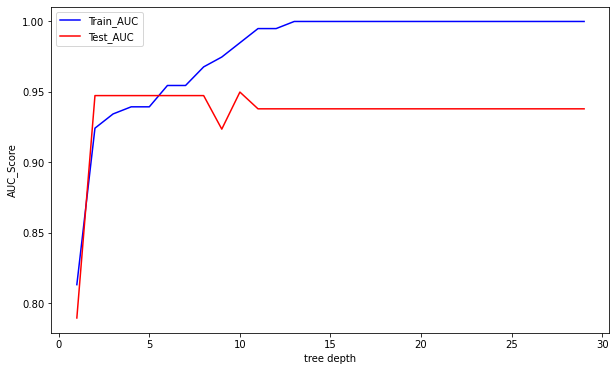

In [299]:
from sklearn.metrics import roc_curve, auc

train_results = []
test_results = []

for i in range(1,30):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)
    
    #data_train
    y_pred_train = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_train)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    #data_test
    y_pred_test = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
                  
#visualisasi multiplot dalam satu kotak
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(range(1,30), train_results, color='blue', label='Train_AUC')
ax.plot(range(1,30), test_results, color='red', label='Test_AUC')
ax.set_xlabel('tree depth')
ax.set_ylabel('AUC_Score')
plt.legend()
plt.show()                  

In [300]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [301]:
y_pred_train_dectree = model.predict(X_train)
y_pred_test_dectree = model.predict(X_test)

In [302]:
classification_eval(y_train, y_pred_train_dectree, 'DT Training')

evaluation model DT Training
[[143   0]
 [ 12  87]]
accuracy: 95.04 %
precision: 100.0 %
recall: 87.88 %


In [303]:
classification_eval(y_test, y_pred_test_dectree, 'DT Testing')

evaluation model DT Testing
[[42  0]
 [ 2 17]]
accuracy: 96.72 %
precision: 100.0 %
recall: 89.47 %


In [304]:
print(classification_report(y_test, y_pred_test_dectree))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      0.89      0.94        19

    accuracy                           0.97        61
   macro avg       0.98      0.95      0.96        61
weighted avg       0.97      0.97      0.97        61



##### Random Forest

In [305]:
rf = RandomForestClassifier(max_depth=5)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [306]:
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

In [307]:
classification_eval(y_train, y_pred_train_rf, 'RF Training')

evaluation model RF Training
[[143   0]
 [ 12  87]]
accuracy: 95.04 %
precision: 100.0 %
recall: 87.88 %


In [308]:
classification_eval(y_test, y_pred_test_rf, 'RF Testing')

evaluation model RF Testing
[[42  0]
 [ 2 17]]
accuracy: 96.72 %
precision: 100.0 %
recall: 89.47 %


#### Modelling Data test (Bersegmentasi Need Attention)

In [309]:
data_test_2 = data_test.copy()
data_test_2.head(3)

,Monetary,Recency,Recency_Score,Monetary_Score,Jarak transaksi pertama dengan terkahir,Frekuensi_Donasi,Device_Android,Device_CFD v2,Device_PWA,Device_Tidak_Diketahui,...,Metode_Pembayaran_Bank Transfer,Metode_Pembayaran_DANA,Metode_Pembayaran_Gopay,Metode_Pembayaran_MANDIRI,Metode_Pembayaran_Mandiri Syariah,Metode_Pembayaran_Muamalat,Metode_Pembayaran_OVO,Metode_Pembayaran_PERMATA,Metode_Pembayaran_credit_card,Metode_Pembayaran_echannel
4,-0.294140,-1.329623,3,1,-1.235406,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
13,-0.203796,-1.219062,3,2,1.189285,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17,-0.232294,-0.188637,2,2,0.132032,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [310]:
data_test_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 4 to 500
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Monetary                                 208 non-null    float64
 1   Recency                                  208 non-null    float64
 2   Recency_Score                            208 non-null    object 
 3   Monetary_Score                           208 non-null    object 
 4   Jarak transaksi pertama dengan terkahir  208 non-null    float64
 5   Frekuensi_Donasi                         208 non-null    object 
 6   Device_Android                           208 non-null    object 
 7   Device_CFD v2                            208 non-null    object 
 8   Device_PWA                               208 non-null    object 
 9   Device_Tidak_Diketahui                   208 non-null    object 
 10  Device_WA                                208 non-n

###### Feature Engineering data test

In [311]:
cols = ['Recency_Score', 'Monetary_Score', 'Frekuensi_Donasi']

for x in cols:
    data_test_2[x] = data_test_2[x].astype('int64')

In [312]:
#hasilkan value Frekuensi Donasi
Frek_Donasi = data_test_2['Frekuensi_Donasi']

#drop kolom Frekuensi_Donasi
data_test_2 = data_test_2.drop(['Frekuensi_Donasi'], axis=1)

In [313]:
print(data_test_2.shape)

(208, 29)


##### Decision Tree

In [314]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [315]:
y_pred_dectree = dt.predict(data_test_2)

In [316]:
classification_eval(Frek_Donasi, y_pred_dectree, 'DT Testing')

evaluation model DT Testing
[[85 63]
 [ 1 59]]
accuracy: 69.23 %
precision: 48.36 %
recall: 98.33 %


In [317]:
print(classification_report(Frek_Donasi, y_pred_dectree))

              precision    recall  f1-score   support

           0       0.99      0.57      0.73       148
           1       0.48      0.98      0.65        60

    accuracy                           0.69       208
   macro avg       0.74      0.78      0.69       208
weighted avg       0.84      0.69      0.70       208



In [318]:
y_pred_tree_proba = dt.predict_proba(data_test_2)[:,1]
y_pred_tree_proba

array([1.        , 1.        , 0.21428571, 1.        , 1.        ,
       0.06382979, 1.        , 1.        , 1.        , 0.06382979,
       0.21428571, 0.06382979, 1.        , 1.        , 0.06382979,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.06382979, 1.        , 1.        , 0.06382979, 0.06382979,
       1.        , 0.06382979, 1.        , 0.06382979, 0.06382979,
       1.        , 0.06382979, 0.06382979, 0.06382979, 0.06382979,
       0.06382979, 1.        , 0.06382979, 0.06382979, 0.06382979,
       0.06382979, 0.06382979, 1.        , 0.06382979, 0.06382979,
       0.06382979, 0.06382979, 0.06382979, 1.        , 1.        ,
       0.21428571, 0.06382979, 0.06382979, 0.06382979, 0.06382979,
       0.06382979, 0.06382979, 1.        , 1.        , 1.        ,
       0.06382979, 0.06382979, 1.        , 1.        , 0.06382979,
       0.06382979, 1.        , 1.        , 1.        , 0.21428571,
       0.21428571, 0.06382979, 1.        , 0.06382979, 0.06382

##### Random Forest

In [339]:
rf = RandomForestClassifier(max_depth=5)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [340]:
y_pred_test_rf = rf.predict(data_test_2)

In [341]:
classification_eval(Frek_Donasi, y_pred_test_rf, 'RF Testing')

evaluation model RF Testing
[[66 82]
 [ 2 58]]
accuracy: 59.62 %
precision: 41.43 %
recall: 96.67 %


In [342]:
print(classification_report(Frek_Donasi, y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.97      0.45      0.61       148
           1       0.41      0.97      0.58        60

    accuracy                           0.60       208
   macro avg       0.69      0.71      0.60       208
weighted avg       0.81      0.60      0.60       208



In [343]:
y_pred_rf_proba = rf.predict_proba(data_test_2)[:,1]
y_pred_rf_proba

array([0.99034188, 0.84181392, 0.36972954, 0.93459417, 0.80228985,
       0.28728058, 0.95206915, 0.75285547, 0.44829192, 0.6262101 ,
       0.31475066, 0.36433716, 0.98525253, 0.89363362, 0.43272303,
       0.83124326, 0.95674362, 0.99238095, 0.96628634, 0.90363362,
       0.22243082, 0.96382648, 0.79048411, 0.28096316, 0.43961113,
       0.77789454, 0.22825562, 0.94941778, 0.27273091, 0.32817173,
       0.82355176, 0.46028328, 0.28144201, 0.67286861, 0.29144201,
       0.29144201, 0.98550317, 0.2721563 , 0.33817173, 0.6238929 ,
       0.26888601, 0.2630105 , 0.93878146, 0.30817173, 0.29144201,
       0.33817173, 0.26888601, 0.29144201, 0.93409133, 0.93878146,
       0.63780527, 0.27824088, 0.30144201, 0.30144201, 0.28945359,
       0.30345953, 0.30345953, 0.93595011, 0.91733592, 0.98525253,
       0.28417381, 0.30345953, 0.8199154 , 0.89342611, 0.61911842,
       0.68695952, 0.98444733, 0.95295906, 0.62336422, 0.31452897,
       0.40766518, 0.62348383, 0.98410823, 0.3086387 , 0.29407

##### Logistic Regression

In [324]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [325]:
y_pred_test_lr = lr.predict(data_test_2)

In [326]:
classification_eval(Frek_Donasi, y_pred_test_lr, 'LR Testing')

evaluation model LR Testing
[[58 90]
 [ 2 58]]
accuracy: 55.77 %
precision: 39.19 %
recall: 96.67 %


In [327]:
y_pred_lr_proba = lr.predict_proba(data_test_2)[:,1]
y_pred_lr_proba

array([0.96723705, 0.48334396, 0.75704503, 0.88513089, 0.84399694,
       0.29981618, 0.99945295, 0.93114237, 0.61068601, 0.58514489,
       0.60012363, 0.40349614, 0.99415818, 0.98491175, 0.25077908,
       0.99809796, 0.97461742, 0.99244359, 0.99191548, 0.97214425,
       0.16114639, 0.98994061, 0.93719077, 0.33516673, 0.25856271,
       0.83255498, 0.06776148, 0.98601168, 0.18769105, 0.25870899,
       0.88114892, 0.26555292, 0.1837025 , 0.62026202, 0.19448177,
       0.19764831, 0.96343608, 0.21864883, 0.31834475, 0.57525569,
       0.31767613, 0.14218887, 0.98153185, 0.32539524, 0.23323816,
       0.33156394, 0.34209348, 0.25168084, 0.97144651, 0.98407301,
       0.82073261, 0.45765601, 0.30396191, 0.30386515, 0.30944626,
       0.319511  , 0.34143985, 0.9737866 , 0.86622303, 0.99716324,
       0.36578798, 0.36594026, 0.93508385, 0.92551017, 0.7138292 ,
       0.81577539, 0.99419426, 0.72341658, 0.67846327, 0.66642843,
       0.63111904, 0.71292518, 0.99625805, 0.3933441 , 0.41840

Berdasarkan testing dengan ketiga metode machine learning, random forest memiliki performa yang lebih baik

In [368]:
#gabungkan data merging rfm dengan y_pred_rf_proba (random forest)
data_test_3 = pd.concat([pd.DataFrame(merging_rfm, index=data_test_2.index), 
                         pd.DataFrame(y_pred_rf_proba, index=data_test_2.index)], axis=1)
data_test_3 = data_test_3.drop(['Frequency', 'Frequency_Score', 'segmentation'], axis=1)
data_test_3.rename({0:'Proba Donasi'}, inplace=True, axis=1)
data_test_3

,ID_Donatur,Monetary,Recency,Recency_Score,Monetary_Score,Device,Zakat,Metode_Pembayaran,Jarak transaksi pertama dengan terkahir,Frekuensi_Donasi,Proba Donasi
4,19,2000.0,87,3,1,CFD v2,Zakat Penghasilan,Gopay,87,1,0.990342
13,52,300000.0,112,3,2,Android,Zakat Penghasilan,MANDIRI,642,1,0.841814
17,66,206000.0,345,2,2,Tidak_Diketahui,Zakat Penghasilan,Bank Transfer,400,1,0.369730
28,105,500168.0,249,3,2,mobile app,Zakat Harta,Mandiri Syariah,249,0,0.934594
29,106,150000.0,196,3,1,Tidak_Diketahui,Zakat Fitrah,Bank Transfer,576,1,0.802290
...,...,...,...,...,...,...,...,...,...,...,...
496,36058,300000.0,11,3,2,Web,Zakat Harta,BCA,11,0,0.964164
497,36060,2000000.0,11,3,3,Web,Zakat Penghasilan,BCA,11,0,0.998140
498,36061,180000.0,8,3,1,Web,Zakat Penghasilan,MANDIRI,8,0,0.861982
499,36064,1500000.0,6,3,3,Web,Zakat Harta,MANDIRI,6,0,0.985253


In [369]:
#tampilkan data dengan frekuensi donasi = 0 & proba donasi >= 0.62
data_target_proba = data_test_3.loc[(data_test_3['Frekuensi_Donasi']==0) & (data_test_3['Proba Donasi']>=0.62)]
data_target_proba

,ID_Donatur,Monetary,Recency,Recency_Score,Monetary_Score,Device,Zakat,Metode_Pembayaran,Jarak transaksi pertama dengan terkahir,Frekuensi_Donasi,Proba Donasi
28,105,500168.0,249,3,2,mobile app,Zakat Harta,Mandiri Syariah,249,0,0.934594
49,23951,2721140.0,525,2,3,Web,Zakat Penghasilan,echannel,525,0,0.626210
58,24255,1350000.0,87,3,3,Web,Zakat Harta,MANDIRI,87,0,0.985253
79,25440,750000.0,150,3,3,Web,Zakat Penghasilan,MANDIRI,150,0,0.992381
125,26444,350000.0,73,3,2,Web,Zakat Penghasilan,MANDIRI,73,0,0.949418
...,...,...,...,...,...,...,...,...,...,...,...
496,36058,300000.0,11,3,2,Web,Zakat Harta,BCA,11,0,0.964164
497,36060,2000000.0,11,3,3,Web,Zakat Penghasilan,BCA,11,0,0.998140
498,36061,180000.0,8,3,1,Web,Zakat Penghasilan,MANDIRI,8,0,0.861982
499,36064,1500000.0,6,3,3,Web,Zakat Harta,MANDIRI,6,0,0.985253


In [370]:
#gabungkan data merging rfm dengan y_pred_test_rf ( 0 & 1)
data_test_4 = pd.concat([pd.DataFrame(merging_rfm, index=data_test_2.index), 
                         pd.DataFrame(y_pred_test_rf, index=data_test_2.index)], axis=1)
data_test_4 = data_test_4.drop(['Frequency', 'Frequency_Score', 'segmentation'], axis=1)
data_test_4.rename({0:'Proba Class'}, inplace=True, axis=1)
data_test_4.head()

,ID_Donatur,Monetary,Recency,Recency_Score,Monetary_Score,Device,Zakat,Metode_Pembayaran,Jarak transaksi pertama dengan terkahir,Frekuensi_Donasi,Proba Class
4,19,2000.0,87,3,1,CFD v2,Zakat Penghasilan,Gopay,87,1,1
13,52,300000.0,112,3,2,Android,Zakat Penghasilan,MANDIRI,642,1,1
17,66,206000.0,345,2,2,Tidak_Diketahui,Zakat Penghasilan,Bank Transfer,400,1,0
28,105,500168.0,249,3,2,mobile app,Zakat Harta,Mandiri Syariah,249,0,1
29,106,150000.0,196,3,1,Tidak_Diketahui,Zakat Fitrah,Bank Transfer,576,1,1


([<matplotlib.patches.Wedge at 0xb7e1fe6d60>,
 [Text(-0.5690716091548726, 0.9413593913346189, 'Berdonasi Kembali'),
  Text(0.5690716091548725, -0.9413593913346189, 'Tidak Berdonasi Kembali')],
 [Text(-0.31040269590265773, 0.513468758909792, '67.3%'),
  Text(0.3104026959026577, -0.513468758909792, '32.7%')])

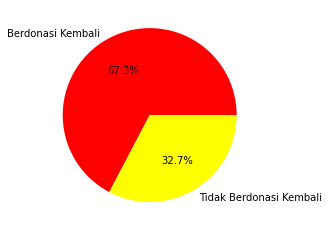

In [377]:
# lihat presentase berdonasi kembali & tidak berdonasi kembali di data class
labels = ['Berdonasi Kembali', 'Tidak Berdonasi Kembali']
sizes = data_test_4['Proba Class'].value_counts(sort=True)
colors = ['red', 'yellow']

plt.pie(sizes, labels=labels, colors=colors, autopct='%0.1f%%')

Pada gambar diatas, jika ditinjau dari kolom proba class maka :
1. Presentase donatur yang diprediksi akan berdonasi kembali sebesar 67.3 %
2. Presentase donatur yang diprediksi tidak akan berdonasi kembali sebesar 32.7 %

In [394]:
tidak_berdonasi = 0
tidak_berdonasi_donasi= 0
berdonasi_tidak_berdonasi = 0
berdonasi = 0
for x in data_test_4['Proba Class'].index:
    if data_test_4['Frekuensi_Donasi'][x]==0 and data_test_4['Proba Class'][x]==0 :
        tidak_berdonasi += 1
    elif data_test_4['Frekuensi_Donasi'][x]==0 and data_test_4['Proba Class'][x]!=data_test_4['Frekuensi_Donasi'][x] :
        tidak_berdonasi_donasi += 1
    elif data_test_4['Frekuensi_Donasi'][x]==1 and data_test_4['Proba Class'][x]!=data_test_4['Frekuensi_Donasi'][x] :
        berdonasi_tidak_berdonasi += 1
    else:
        berdonasi += 1
        

In [402]:
a = np.round((tidak_berdonasi/len(data_test_4))*100,2)
b = np.round((tidak_berdonasi_donasi/len(data_test_4))*100,2)
c = np.round((berdonasi_tidak_berdonasi/len(data_test_4))*100,2)
d = np.round((berdonasi/len(data_test_4))*100,2)

In [416]:
percentage = pd.DataFrame([a,b,c,d], columns=['Presentase'])
percentage

,Presentase
0,31.73
1,39.42
2,0.96
3,27.88


([<matplotlib.patches.Wedge at 0xb7e1979580>,
 [Text(0.5971740304894998, 0.9237874091526287, '31.73 % tidak berdonasi'),
  Text(-1.0954684247350006, -0.09974432519505454, '39.42 % tidak berdonasi diprediksi berdonasi'),
  Text(-0.23069660044037882, -1.0755366467699985, '0.96 % berdonasi diprediksi tidak berdonasi'),
  Text(0.7042830068923307, -0.8449765950620748, '27.88 % berdonasi')])

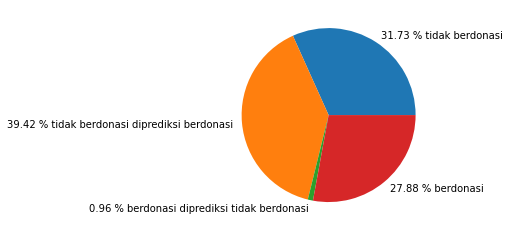

In [419]:
# lihat presentase berdonasi, tidak berdonasi, tidak berdonasi diprediksi berdonasi, berdonasi diprediksi tidak berdonasi di data class
labels = ['31.73 % tidak berdonasi', '39.42 % tidak berdonasi diprediksi berdonasi', 
          '0.96 % berdonasi diprediksi tidak berdonasi', '27.88 % berdonasi']
sizes = np.array([31.73, 39.42, 0.96, 27.88])

plt.pie(sizes, labels=labels)

pada gambar diatas jika kolom proba_class dihubungkan dengan kolom frekuensi donasi maka :
1. sebesar 39.42 % donatur yang tidak berdonasi diprediksi akan berdonasi
2. sebesar 31.73 % donatur yang tidak berdonasi diprediksi tidak berdonasi
3. sebesar 27.88 % donatur yang berdonasi diprediksi akan berdonasi
4. sebesar 0.96 % donatur yang berdonasi diprediksi tidak akan berdonasi


dari presentase diatas, donatur yang akan dilakukan recampaign adalah donatur dengan presentase 39.42 %

In [360]:
data_target_class = data_test_4.loc[(data_test_4['Frekuensi_Donasi']==0) & (data_test_4['Prediksi Frekuensi']==1)]
data_target_class

,ID_Donatur,Monetary,Recency,Recency_Score,Monetary_Score,Device,Zakat,Metode_Pembayaran,Jarak transaksi pertama dengan terkahir,Frekuensi_Donasi,Prediksi Frekuensi
28,105,500168.0,249,3,2,mobile app,Zakat Harta,Mandiri Syariah,249,0,1
49,23951,2721140.0,525,2,3,Web,Zakat Penghasilan,echannel,525,0,1
58,24255,1350000.0,87,3,3,Web,Zakat Harta,MANDIRI,87,0,1
79,25440,750000.0,150,3,3,Web,Zakat Penghasilan,MANDIRI,150,0,1
125,26444,350000.0,73,3,2,Web,Zakat Penghasilan,MANDIRI,73,0,1
...,...,...,...,...,...,...,...,...,...,...,...
496,36058,300000.0,11,3,2,Web,Zakat Harta,BCA,11,0,1
497,36060,2000000.0,11,3,3,Web,Zakat Penghasilan,BCA,11,0,1
498,36061,180000.0,8,3,1,Web,Zakat Penghasilan,MANDIRI,8,0,1
499,36064,1500000.0,6,3,3,Web,Zakat Harta,MANDIRI,6,0,1


<AxesSubplot:xlabel='Monetary', ylabel='Recency'>

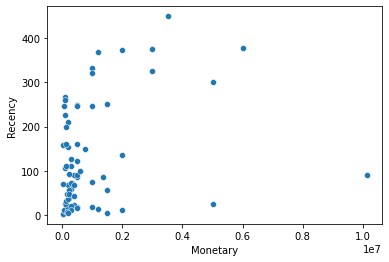

In [346]:
sns.scatterplot(x='Monetary', y='Recency', data=data_target)

In [127]:
#export data whitelist ke csv
whitelist = data_target_proba[['ID_Donatur', 'Proba Donasi']]
whitelist.to_csv('whitelistrf.csv', index=False)